<a href="https://colab.research.google.com/github/tamburins/ESAA_2023/blob/main/ESAA_review_for_conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 4 합성곱 신경망
# 01 합성곱 신경망

데이터가 가진 특징들의 패턴을 학습하는 알고리즘으로 이미지분류, 객체탐지, 스타일 전이 등을 예로 들 수 있다.

예를 들어 그림을 보면 고양이 또는 강아지 사진으로 모델을 학습시키면 모델은 이미지의 특징을 추출해 고양이 또는 강아지를 분류할 수 있게 된다. 즉 이미지를 인식할 수 있는 능력을 모델이 갖추게 된다.

객체 탐지 사례를 보자. 이미지에서 특정객체를 인식하고 이미지의 어디에 있는지까지 위치까지 파악하는 기술이다. 고양이 이미지의 위치에 표시된 노랑 실선을 경계박스라 부르고 인식한 객체가 어떤 클래스에 속하는지 분류 확률과 예측을 함께 알려준다. 일반적으로 객체의 위치는이미지의 좌표값으로 나타내기 때문에 경계박스를 찾는 문제는 회귀분석으로 해결된다. 반면 클래스 예측문제는 분류 문제가 된다.

한편 스타일전이는 콘텐츠 이미지와 스타일 참조 이미지를 활용해 콘텐츠의 기본 형태를 유지하고 스타일을 입혀 새 이미지를 생성하는 기술을 말한다.

# 1-1 이미지 표현

이미지 또는 영상을 컴퓨터가 이해하려면 숫자로 표현해야 한다.

숫자 0은 검정, 255는 흰색으로 표현하여 각 픽셀의 화소값을 나타낼 수 있따.즉 색이 진할수록 숫자가 클수록 더 큰 특성을 나타낸다 할 수 있다. 커러이미지는 rgb 채널로 구성된 3장의 이ㅣㅈ를 겹쳐 표현한다. 채널이미지는 채널이 1개인 흑백이미지와 마찬가지로 0-255 사이의 숫자로 나ㅏ낸다.  컬러이미지는 3개의 채널이미지를 하나로 결합하여 표현하는 방식이다.

# 1-2 합성곱

입력이미지에 대해 일반적ㅇ로 정방형 크기를 갖는 커널을 사용하여 입력이미지에 대한 특성을 추출하는 방법을 합성곱이라 한다. 합성곱 연산을 통해 추출된 이미지를 특성맵이라 한다.

입력이미지 크기는 세로, 가로 순서로 shape이 출력되는데, 입력 이미지으 ㅣ좌측 상단부터 커널과 같은 크기를 갖도록 입력 이미지의 일부분에 커널이 겹치도록 투영해준다. 이렇게 입력이미지와 커널이 겹치는 부분에 대하여 합성곱 연산을 해준다.

예를 들어 3 바이 3 사이즈를 갖는 커널이 첫 좌측 상단의 input image의 3바이 3부분과 매칭되어 합성곱 연산을 수행한다. 합성곱 연산은원소기반 곱셈 연산을 수행후 모두 더한 값으로 단일 스칼라값이 나온다. 이렇게 나온 결과는 추출된 이미지인 feature map의 좌측상단의 첫번째값이 된다.
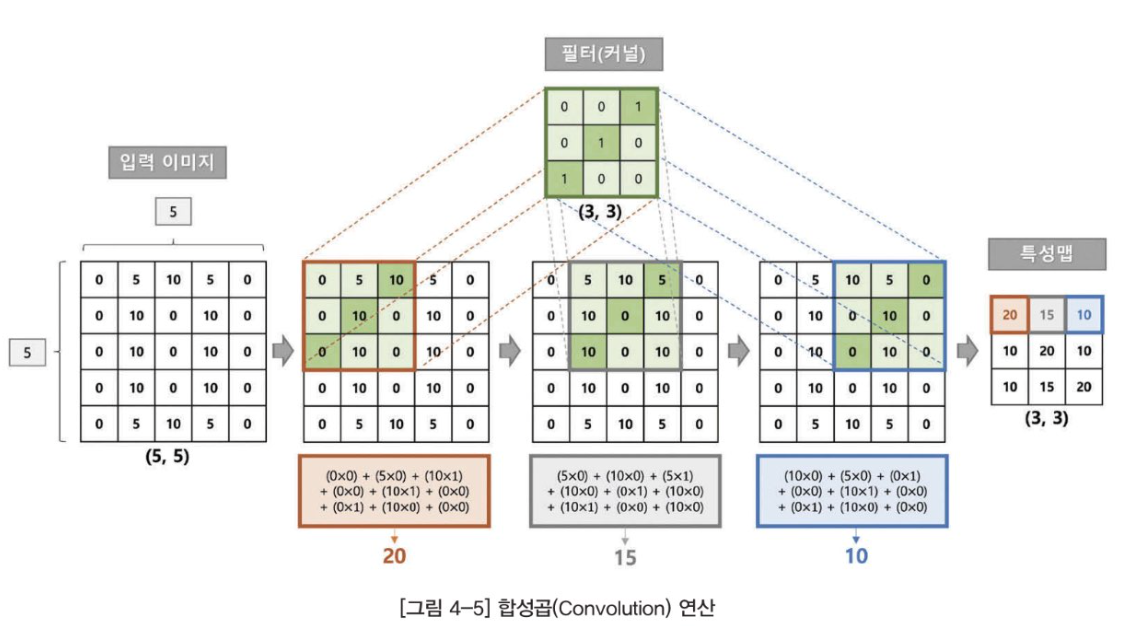

커널 사이즈가 3바이 3인경우 총 9개의 가중치를 가지며 오차 역전파시 커널의 가중치를 업데이트한다. 합성곱 신경망이 이미지 특성 추출에 효율적인 이유는 바로 커널의 공유 가중치로 오차 역전파시 커널의 그래디언트를 계산할 때 9개에 대해서만 업데이트하면 되므로 완전 연결층을 사용할 떄보다 연산량이 훨씬 적다는 장점이 있다.

## 1-3 채널
채널은 입력이미지를 구성하는 2차원 배열의 개수로 컬러이미지가 3개의 채널을 갖는다. 이 경우 shape이 (5,5,3)으로 표현된다.

컬러이미지와 같이 입력이미지가 여러 채널을 갖는 경우 합성곱 연산 수행시 특서ㅇ맵의 생성과정을 잘 살펴야 한다.먼저 입력이미지의 채널개수만큼 커널이 생성되고, 각 채널마다 하나씩 커널을 적용하여 합성곱 연산을 수행한다. 이 과정을 거치면 입력이미지의 채널개수만큼 합성곱 연산된 결과가 생성되고 원소기반 덧셈 연산으로 모두 더해주면 최종 특성맵이 완성된다.

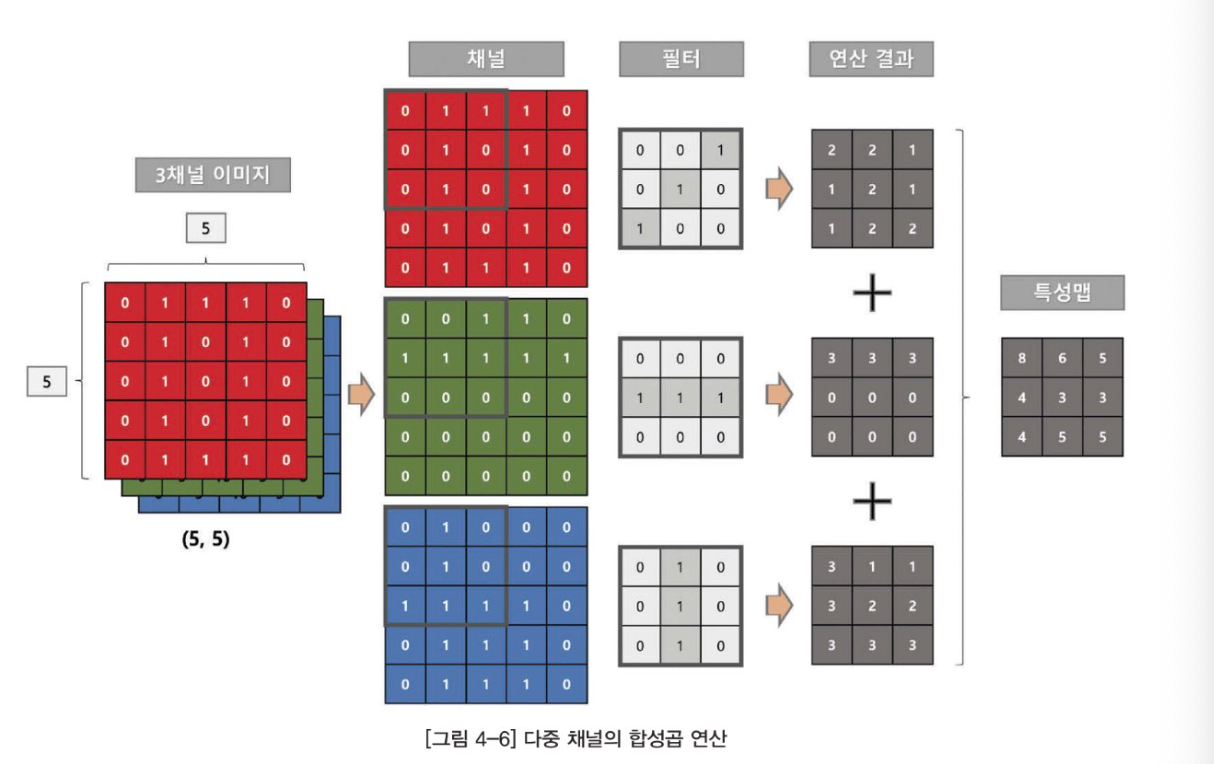

만약 합성곱 레이어에 출력 필터의 개수를 20개로 설정했다면 입력이미지의 채널개수 3개와 출력필터의 개수 20개가 곱해져 총 60개의 커널이 ㄱ생성된다. 하나의 커널 사이즈가 3 바이 3이라면 총 540개가 된다. 즉 업데이트할 가중치의 그래디언트는 540개이다.

여기에 편향이 추가로 되는데 20개의 출력필터개수만큼 추가된 560개의 파라미터를 갖는다.

## 1-4 스트라이드

커널은 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하며 합성곱 연상르 계속 수행하고 특성맵에 결과를 채워나간다. 이대 이동하는 간격을 스트라이드로 정의하며 1,2로 주로 설정한다.

스트라이드1 설정시 커널은 우측으로 1픽셀식 이도하며, 커널이 입력이미지의 우측끝까지 이동할 경우 아래방향으로 한칸 좌측 첫번째 픽셀로 이동하여 추출한다. 스트라이드를 2로 설정하면 2픽셀식 건너뛰며 특성맵의 크기가 1/2로 줄어들게 된다.

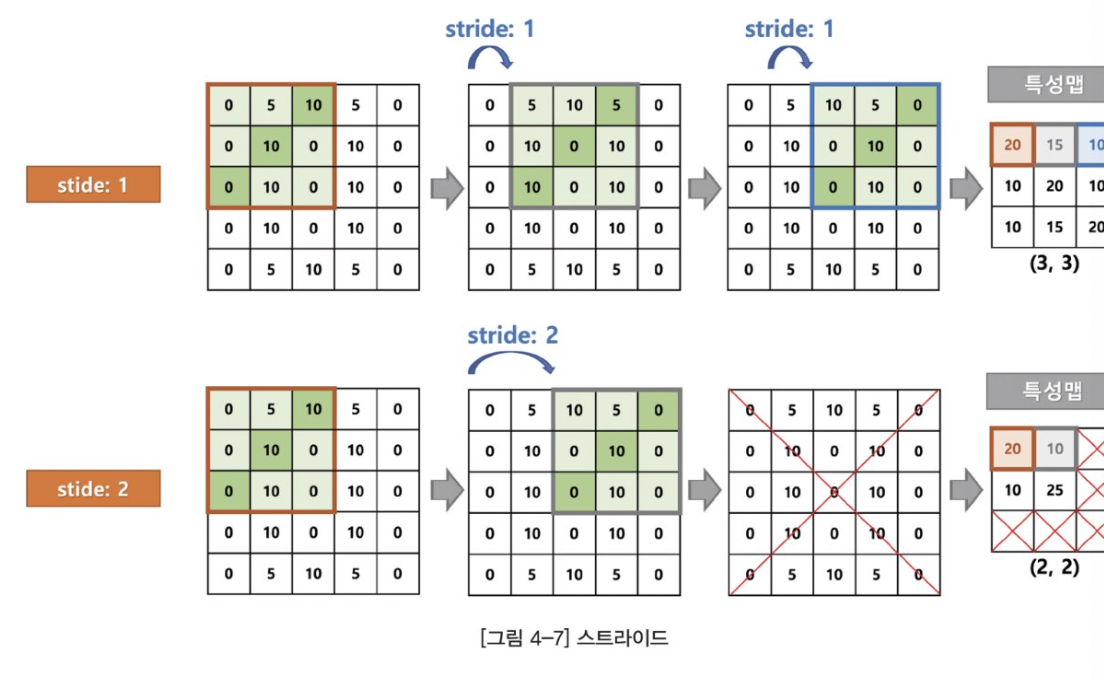

## 1-5 패딩

추출된 특성맵의 크기가 입력 이미지대비 줄어들지 않도록 설정하는 것으로 가장자리에 0이 채워진 zeropadding을 주로 ㅅ아요한다.

텐서플로 케라스의 conv2d에서 padding='same'설정시 제로패딩이 가능하다.

## 1-6 특성맵 사이즈

패딩과 스트라이드를 적용하고 입력 데이터와 필터의 크기가 주어졌을 때 출력데이터의 크기를 구하는 식은 입력크기, 필터크기, 스트라이드,패딩, 출력크기에 의해 구한다.

## 1-7 풀링

풀링레이어는 추출된 특성맵에 대해 다운샘플링하여 이미지의 크기를축소하는 레이어로 이미지축소를 통해 연산량을 감소하고 과대적합 방지라는 장점을 갖는다.

풀링레이어는 최대풀링과 평균풀링으로 나뉜다. 최대풀링은 특징의 값이 큰 값이 다른 특징들을 도입한다는 개념으로 도입되었다.

최대 풀링 수행시 커널의 크기가 주로 2 바이 2로 주어질 떄입력 이미지의 2 바이 2 픽셀 중 최대값이 출력값으로선택된다. 평균 풀링르 수핸하면 2 바이 2 픽셀들의 평균값이 출력값으로 나온다. 풀링 레이어도 스트라이드 값을 가지며 2로 설정시 2칸씩 건너뛰며 풀링을 수행한다. 최대 풀링의 커널 크기를 2 바이 2로 설정하고 스트라이드를 2로 설정시 출력이미지는 입력 이미지 대비 1.2, 1/2로 줄어들어 총 1/4로줄어든다.

# 02 간단한 모델 생성
## 2-1 데이터 로드 및 전처리

In [1]:
import tensorflow as tf

훈련셋과 검증셋으로 구분하여 튜플형태로 정리한다.각각 28픽셀의 세로가로 손글씨 이미지와 숫자레이블이 매칭되어 있다.

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid)=mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


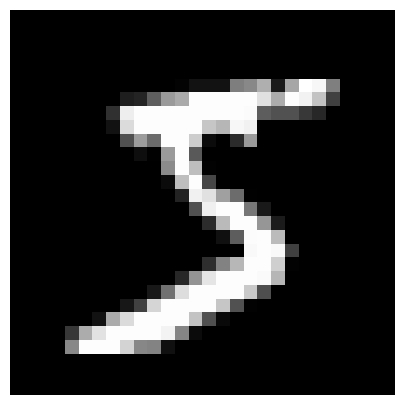

In [3]:
#first image > 5
import matplotlib.pyplot as plt
def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()
plot_image(x_train, 0)

In [4]:
# print min, max of pixcel
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())


0 255
0 255


In [5]:
# normalization
x_train = x_train/255.0
x_valid=x_valid/255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())


0.0 1.0
0.0 1.0


mnist 데이터셋은 색상을 나타내는 채널이 1개인 모노 컬러 이미지로 cnn 모델에 주입하기 위해서는 채널을 추가해야한다. 그래서 60000, 28, 28의 텐서가 60000, 28, 28, 1이 된다.



In [6]:
print(x_train.shape, x_valid.shape)
x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train.shape, x_valid.shape)


(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28) (10000, 28, 28)


## 2-2 sequential api 모델 생성 및 학습

sequential api를 사용하여 합성곱 레이어 1개 풀링레이어 1개를 적용하는 간ㄷ안한 모델을 만든다. 최종 분류기로 dense 레이얼르 적용하기 위해 flatten 층을 추가하여 1차원 배열로 펼쳐준다. 합성곱은 conv2d 레이어를 사용하고 3 바이 3 크기의 서로 다른 32가지 종류의 커널을 적용한다. relu  활성화 함수를 적용하며 conv 이름을 지정한다.

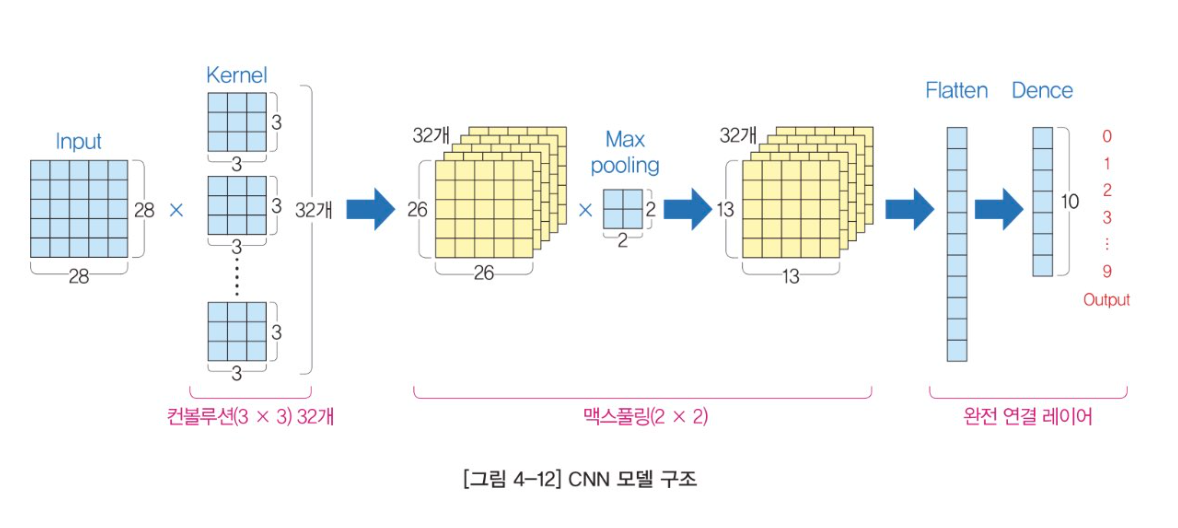

풀링레이어는 2,2 크기로 최대풀링을 적용하고 레이어 이름 속성도 추가해준다. 최종 분류기는 정답 레이블이 0-9까지 10개의 값을 가지므러 노드 개수를 10개로 하고, 분류 클래스가 10개인 다중 분류 문제이므로 활성화함수로 softmax를 적용한다.

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu',
                           input_shape=(28, 28, 1), name='conv'),
    tf.keras.layers.MaxPooling2D((2,2),name='pool'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

앞서 정의한 몯레구조에 옵팀아ㅣ저, 손실함수, 평가지표를 설정해주고 컴파일하면 모델 인스턴스가 생성된다 fit 메소드에 훈련셋과 검증셋을 주입하고, 에폭을 10으로 지정한다. 코드셀을 실행하면 모델이 학습하면서 에폭당 손실과 평가결과를 출력한다. 두번쨰 에폭을 마친 상태에서도 훈련셋과 검증셋 모두 높은 정확돌르 보인다.

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history= model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.2100 - accuracy: 0.9416 - val_loss: 0.0823 - val_accuracy: 0.9746
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0771 - accuracy: 0.9775 - val_loss: 0.0610 - val_accuracy: 0.9804
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0582 - accuracy: 0.9821 - val_loss: 0.0529 - val_accuracy: 0.9834
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0477 - accuracy: 0.9860 - val_loss: 0.0515 - val_accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0400 - accuracy: 0.9880 - val_loss: 0.0561 - val_accuracy: 0.9813
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0346 - accuracy: 0.9891 - val_loss: 0.0584 - val_accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0296 - accuracy: 0.9911 - val_loss: 0.0485 -

In [9]:
# evaluate and get loss
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 6ms/step - loss: 0.0575 - accuracy: 0.9819


[0.0574786551296711, 0.9818999767303467]

모델 훈련 단계에서 훈련 결과를 history 객체에 저장하여 10에폭동안 모델의 예측오차와 정확도를 그래프로 그리는 함수를 정의하고 실행한다. 그래프를 보면 훈련셋에 대한 손실은 줄어드는데 검증셋이 손실은 어느정도 수준에서 감소하지 않은 것을 통해 과대적합 된 것을 알 수 있다.

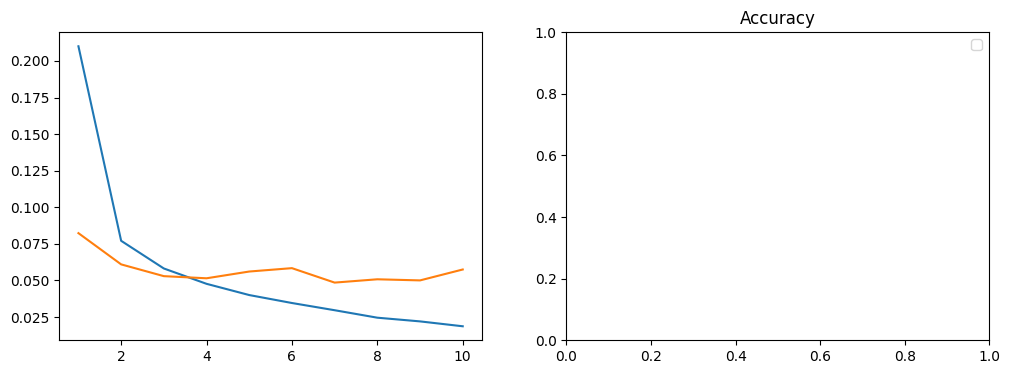

In [10]:
def plot_loss_acc(history, epoch):
  loss, val_loss = history.history['loss'], history.history['val_loss']
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
  fig, axes = plt.subplots(1,2, figsize=(12,4))

  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()
plot_loss_acc(history, 10)

## 2-3 모델 구조 파악
모델 인승턴스에 서머리 메소도를 적용하면 요약하여 레이어의 이름과 출력 텐서의 형태 각 레이어를 구성하는 파라미터 개수를 알 수 있다.

28, 28, 1 형태의 입력 텐서가 conv2D를 거치며 26, 26, 32 형태로 변환됏다. 3,3 크기의 합성곱 필터를 사용하기 때문에 이미지 가로 세로 크기가 2씩 줄어든다. 여기서 패딩은 적용되지 않으며 서로 다른 32개의 필터를 적용했기 때문에 26,26 크기의 특성맵ㅇ팅 32개 생성된다. 즉 28, 28, 1이미지에 서로 다른 커널을 32개 적용해서 32가지 종류의 피처ㅡㄹ 추출한 것이다.

2,2 크기의 풀링레이어를 적용했기 때문에 이미지 크기가 1/2로 줄어든다. 따라서 풀링레이어를 거치면 13,13,32로 변환되고 flatten 층에서 3차우너 텐서를 1차원 텐서로 펼치면 5400여개의 원소를 갖는 1차우너 벡터가 된다.

이 벡터를 출력노드 10개의 dense 레이어로 보내면 최종 분류값을 예측하여 출력한다.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


생성된 모델 인스턴스의 input 속성으로부터 입력 레이어의 텐서를 추출할 수 있다. 입력 텐서는 none, 28, 28, 1로 가장 앞의 none 값은 배치크기가 어떤 값이든 가능하단 뜻이다.

In [12]:
model.input # 입력 텐서형태

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [13]:
model.output # 출력 텐서 형태

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [14]:
model.layers # 레이어추출> 레이어속성 확인

In [15]:
model.layers[0] # 첫번째 레이어 선택

In [16]:
model.layers[0].input # 첫번째 레이어 입력

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [17]:
model.layers[0].output # 첫번째 레이어 출력

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

각 레이어의 가중치 행렬을 추출할 수 있다. 가중치 속성을 각 레이어 인스턴스에 적용하면 된다,

밑의 모델에서는 두개의 텐서플로 변수행렬이 확인되며 첫번째는 커널행렬의 가중치, 두번째는 커널의 상수항을 의미한다

In [18]:
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-0.22739863,  0.06877574,  0.3456726 , -0.11278953,
            0.33070737,  0.00954083, -1.025539  , -0.22891682,
           -0.77362967, -0.02020791, -0.50407153, -1.2229577 ,
            0.16454785,  0.26242286, -0.07146251,  0.06734037,
           -0.35322973,  0.29147264, -0.43194756,  0.2859084 ,
           -0.12046842, -0.14179681,  0.35263216,  0.39255944,
           -0.7584244 , -0.99014974,  0.37350023,  0.00476941,
           -0.33872125,  0.22386532, -0.06735118, -0.34469837]],
 
         [[ 0.03028989, -0.41384685,  0.07943269,  0.34519583,
            0.5004982 ,  0.5325433 , -0.66195446,  0.4130955 ,
           -0.02447058, -0.4449931 , -0.34054106, -0.65121096,
           -0.08108272,  0.19414243, -0.13000348,  0.10172321,
           -0.82391554, -0.19410554,  0.11603478,  0.39612058,
            0.40312287, -0.6105107 ,  0.33446407, -0.00356793,
           -0.02714385, -1.1034801 , -0.11

실행 결과에서 커널 가중치의 shape이 (3,3,1,32)라는 것을 알 수 ㅣㅇㅆ다, 여기서 앞의 3,3은 필터의 크기, 1은 입력층의 채널개수, 32는 출력층의 채널개수로 1번층의 학습가능한 파라미터 수는 288개이다. 상수항가중치는 32, 모양이고 이는 출력층의 채널수로 총 학습가능한 파라미터수는 커널과 상수항을 합해 320개이다.

한편 다음과 같이 커널행렬의 가중치 또는 상수항ㅇ르 따로 선택할 수도 있다.

In [19]:
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-0.22739863,  0.06877574,  0.3456726 , -0.11278953,
           0.33070737,  0.00954083, -1.025539  , -0.22891682,
          -0.77362967, -0.02020791, -0.50407153, -1.2229577 ,
           0.16454785,  0.26242286, -0.07146251,  0.06734037,
          -0.35322973,  0.29147264, -0.43194756,  0.2859084 ,
          -0.12046842, -0.14179681,  0.35263216,  0.39255944,
          -0.7584244 , -0.99014974,  0.37350023,  0.00476941,
          -0.33872125,  0.22386532, -0.06735118, -0.34469837]],

        [[ 0.03028989, -0.41384685,  0.07943269,  0.34519583,
           0.5004982 ,  0.5325433 , -0.66195446,  0.4130955 ,
          -0.02447058, -0.4449931 , -0.34054106, -0.65121096,
          -0.08108272,  0.19414243, -0.13000348,  0.10172321,
          -0.82391554, -0.19410554,  0.11603478,  0.39612058,
           0.40312287, -0.6105107 ,  0.33446407, -0.00356793,
          -0.02714385, -1.1034801 , -0.11231939,  0.511582

In [20]:
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.10554226, -0.22527792, -0.2596426 , -0.00173503, -0.00597933,
       -0.02009602, -0.03520031, -0.0264874 , -0.14826085, -0.23839164,
       -0.08795568, -0.02244865, -0.20459595, -0.23250204, -0.14786337,
       -0.24657552,  0.25242382, -0.18831702, -0.19247484, -0.03229161,
       -0.3518288 , -0.19850618, -0.28440884, -0.18689777, -0.01341196,
       -0.00474399, -0.362915  ,  0.00271002, -0.13628018, -0.12199685,
       -0.00896856, -0.06060889], dtype=float32)>

In [21]:
# choose with name
model.get_layer('conv')

In [22]:
# set activator model which get final ouput in first and second layers' ouput
activator = tf.keras.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis, ...])
len(activations)

1/1 [==============================] - 0s 94ms/step


2

In [23]:
# first tensor layer output
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

첫번쨰 레이어에서 출력되는 특성맵 이미지를 32개 커널별로 구분하여 시각화한다. 출력이미지의 특징이 조금 씩 차이가 있는 것을 볼 수 있다. 이처럼 각 커널은 입ㅈ력 이미지로부터 서로 다른 피처를 추출하는 역할을 한다.

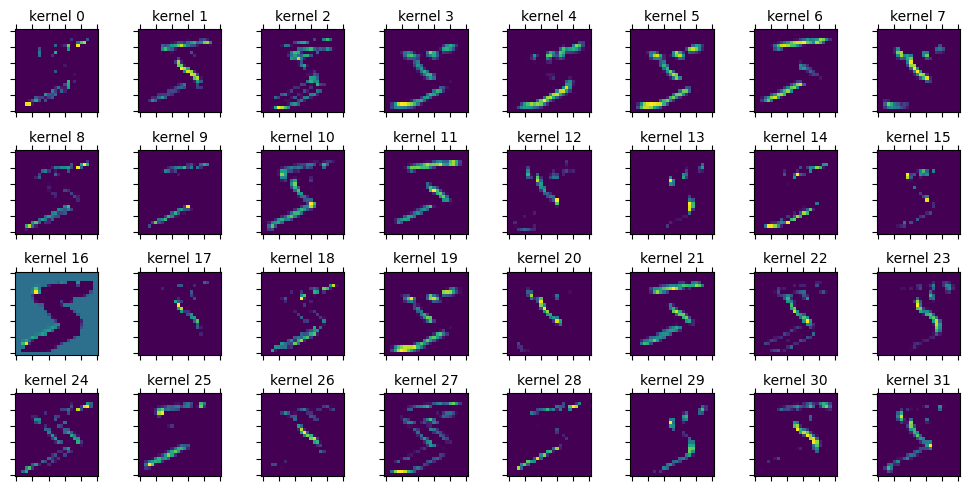

In [24]:
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0,:,:,i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s' %str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)
plt.tight_layout()
plt.show()

In [25]:
# maximum pooling layer
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


각 커널별 특성맵 이미지를 시각화하면 앞선 conv2d 출력 이미지에 비해 크기가 굵어진 것을 알 수 있다. 최대 풀링은 인근 픽셀들을 모아 최대값으로 고정하고 픽셀수를 줄이면서 특징을 더욱 강하게 드러낼 수 있다.

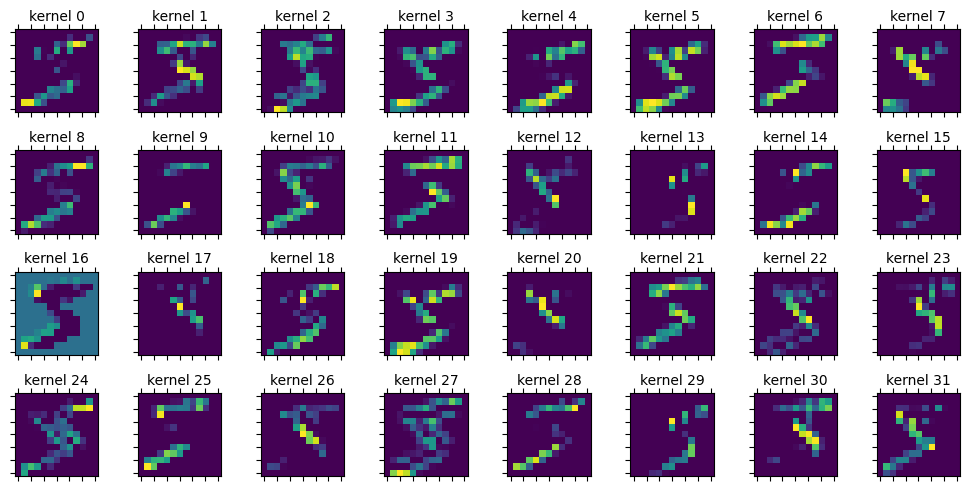

In [26]:
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0,:,:,i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s' %str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)
plt.tight_layout()
plt.show()